In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#   for filename in filenames:
#       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Yeni yöntem

In [1]:
import tensorflow as tf
import torch

import numpy as np 
import pandas as pd 
from matplotlib import image
from matplotlib import pyplot as plt
from tensorflow import keras
import os
import time
import datetime
from PIL import Image

from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model

In [2]:
batch_size = 64
img_size = 128

master_dir = 'val_256/train_samples/*.jpg'


In [3]:
def Load(image):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.cast(image, tf.float32)
    return image

def GrayScale(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

def resize(image, height, width):
    input_image = tf.image.resize(image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image

@tf.function
def jitter(real_image, height, width):
    real_image = resize(real_image, height, width)
    return real_image

def normalize( real_image):
    real_image = (real_image / 255)
    return real_image

def Load_image_train(image):
    real_image = Load(image)
    real_image = jitter(real_image, img_size, img_size)
    real_image = normalize(real_image)
    input_image = GrayScale(real_image) 
    return input_image, real_image

In [4]:
train_dataset = tf.data.Dataset.list_files(master_dir)
train_dataset = train_dataset.map(Load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(400)
train_dataset = train_dataset.batch(batch_size)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model

# img_size değişkenini tanımlayın
img_size = 256

# get_generator_model fonksiyonunu tanımlayın
def get_generator_model():
    inputs = Input(shape=(img_size, img_size, 1))
    
    conv1 = Conv2D(filters=64, kernel_size=(4, 4), strides=1, padding='same')(inputs)
    conv1 = LeakyReLU()(conv1)
    
    conv2 = Conv2D(filters=64, kernel_size=(4, 4), strides=2, padding='same')(conv1)
    conv2 = LeakyReLU()(conv2)
    
    conv3 = Conv2D(filters=128, kernel_size=(4, 4), strides=2, padding='same')(conv2)
    conv3 = LeakyReLU()(conv3)
    
    conv4 = Conv2D(filters=256, kernel_size=(4, 4), strides=2, padding='same')(conv3)
    conv4 = LeakyReLU()(conv4)
    
    conv5 = Conv2D(filters=512, kernel_size=(4, 4), strides=2, padding='same')(conv4)
    conv5 = LeakyReLU()(conv5)
    
    conv6 = Conv2D(filters=512, kernel_size=(4, 4), strides=2, padding='same')(conv5)
    conv6 = LeakyReLU()(conv6)
    
    conv7 = Conv2D(filters=512, kernel_size=(4, 4), strides=2, padding='same')(conv6)
    conv7 = LeakyReLU()(conv7)
    
    conv8 = Conv2D(filters=512, kernel_size=(4, 4), strides=2, padding='same')(conv7)
    conv8 = LeakyReLU()(conv8)
    
    deconv8 = Conv2DTranspose(filters=512, kernel_size=(4, 4), strides=2, padding='same', activation='relu')(conv8)
    deconv8 = Concatenate()([conv7, deconv8])
    
    deconv7 = Conv2DTranspose(filters=512, kernel_size=(4, 4), strides=2, padding='same', activation='relu')(deconv8)
    deconv7 = Concatenate()([conv6, deconv7])
    
    deconv6 = Conv2DTranspose(filters=512, kernel_size=(4, 4), strides=2, padding='same', activation='relu')(deconv7)
    deconv6 = Concatenate()([conv5, deconv6])
    
    deconv5 = Conv2DTranspose(filters=256, kernel_size=(4, 4), strides=2, padding='same', activation='relu')(deconv6)
    deconv5 = Concatenate()([conv4, deconv5])
    
    deconv4 = Conv2DTranspose(filters=128, kernel_size=(4, 4), strides=2, padding='same', activation='relu')(deconv5)
    deconv4 = Concatenate()([conv3, deconv4])
    
    deconv3 = Conv2DTranspose(filters=64, kernel_size=(4, 4), strides=2, padding='same', activation='relu')(deconv4)
    deconv3 = Concatenate()([conv2, deconv3])
    
    deconv2 = Conv2DTranspose(filters=64, kernel_size=(4, 4), strides=2, padding='same', activation='relu')(deconv3)
    deconv2 = Concatenate()([conv1, deconv2])
    
    deconv1 = Conv2D(filters=3, kernel_size=(1, 1), padding='same', strides=1, activation='tanh')(deconv2)
    
    model = Model(inputs, deconv1)
    
    return model

# Modeli oluşturun
generator = get_generator_model()
generator.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,088 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     65,600 │ leaky_re_lu[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │    131,200 │ leaky_re_lu_1[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │    524,544 │ leaky_re_lu_2[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (LeakyReLU)         │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │  2,097,664 │ leaky_re_lu_3[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 16, 16,    │          0 │ conv2d_4[0][0]    │
│ (LeakyReLU)         │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 8, 8, 512) │  4,194,816 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 8, 8, 512) │          0 │ conv2d_5[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 4, 4, 512) │  4,194,816 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 4, 4, 512) │          0 │ conv2d_6[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 2, 2, 512) │  4,194,816 │ leaky_re_lu_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_7       │ (None, 2, 2, 512) │          0 │ conv2d_7[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 4, 4, 512) │  4,194,816 │ leaky_re_lu_7[0]

 Total params: 42,014,595 (160.27 MB)

 Trainable params: 42,014,595 (160.27 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
generator = get_generator_model()

In [7]:
def get_discriminator_model():
    layers = [
            tf.keras.layers.Conv2D( filters = 64, kernel_size=( 4 , 4 ), strides=2, activation='relu', padding='same', input_shape=(img_size, img_size, 3)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D( filters = 128, kernel_size=( 4 , 4 ), strides=2, activation='relu', padding='same' ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D( filters = 256, kernel_size=( 4 , 4 ), strides=2, activation='relu', padding='same' ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D( filters = 512, kernel_size=( 4 , 4 ), strides=1, activation='relu', padding='same' ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Conv2D( filters = 1, kernel_size=( 4 , 4 ), strides=1, padding='same' ),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense( 512, activation='relu'  )  ,
            tf.keras.layers.Dense( 128 , activation='relu' ) ,
            tf.keras.layers.Dense( 16 , activation='relu' ) ,
            tf.keras.layers.Dense( 1 , activation='sigmoid' ) 
        ]
    
    model = tf.keras.models.Sequential( layers )
    return model

In [8]:
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=32)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [9]:
discriminator = get_discriminator_model()

/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1 ) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1  ) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output , real_y):
    real_y = tf.cast( real_y , 'float32' )
    return mse( fake_output , real_y )

In [12]:
generator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.0005 )

In [14]:
sample_image = tf.io.read_file('val_256/train_samples/Places365_val_00000002.jpg')
sample_image = tf.io.decode_jpeg(sample_image, channels=3)
sample_image = tf.cast(sample_image, tf.float32)
sample_image = tf.image.resize(sample_image, [img_size, img_size], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
real_sample_image = sample_image
sample_image =  tf.image.rgb_to_grayscale(sample_image)
print(sample_image.shape)

(256, 256, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


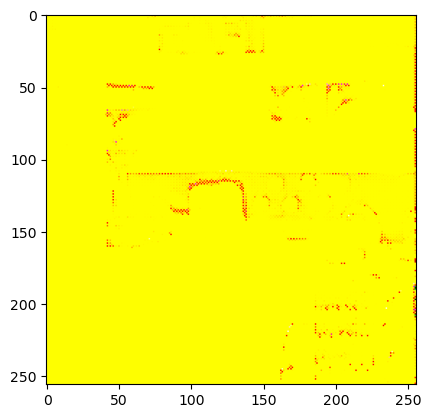

In [15]:
gen_output = generator(sample_image[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0])

In [16]:
checkpoint_path = "./"
checkpoint_dir = os.path.dirname(checkpoint_path)

log_dir="logs/"
summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [17]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [18]:
@tf.function
def train_step( input_x , real_y, e ):
   
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

        generated_images = generator( input_x , training=True)
     
        real_output = discriminator( real_y, training=True)

        generated_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss( generated_images , real_y )
        
        disc_loss = discriminator_loss( real_output, generated_output )
        
    
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    with summary_writer.as_default():
        tf.summary.scalar('Generator Loss : ', gen_loss, step=e)
        tf.summary.scalar('Dicriminator Loss : ', disc_loss, step=e)
    
    generator.call

## TRAIN

In [19]:
for element in train_dataset.take(1):
    print(element)


(<tf.Tensor: shape=(64, 128, 128, 1), dtype=float32, numpy=
array([[[[0.6838099 ],
         [0.6838099 ],
         [0.687731  ],
         ...,
         [0.7207616 ],
         [0.7207616 ],
         [0.7207616 ]],

        [[0.6162134 ],
         [0.6162134 ],
         [0.6201346 ],
         ...,
         [0.6776287 ],
         [0.6776287 ],
         [0.6776287 ]],

        [[0.6310039 ],
         [0.63492507],
         [0.6388463 ],
         ...,
         [0.72860396],
         [0.72860396],
         [0.72860396]],

        ...,

        [[0.32955843],
         [0.29818904],
         [0.274662  ],
         ...,
         [0.541809  ],
         [0.58722633],
         [0.23118159]],

        [[0.30882275],
         [0.32842863],
         [0.32103336],
         ...,
         [0.6299722 ],
         [0.60743064],
         [0.29726785]],

        [[0.3205863 ],
         [0.31274393],
         [0.30534863],
         ...,
         [0.65490705],
         [0.59522   ],
         [0.35636356]]],




2024-07-04 15:28:29.016240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
num_epochs = 20

for e in range( num_epochs ):
    start_time = time.time()
    for (x,y) in train_dataset:
        train_step( x , y , e)
    if e%10 == 0:
        print('Epoch ', e,' Elapsed ', round(time.time()-start_time,0), 'seconds')

ValueError: in user code:

    File "/var/folders/kc/txgh3xkn0xgfsxb3fpxhwsvc0000gn/T/ipykernel_96674/2623332088.py", line 6, in train_step  *
        generated_images = generator( input_x , training=True)
    File "/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/Users/hbasriuzun/anaconda3/lib/python3.11/site-packages/keras/src/layers/input_spec.py", line 245, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 256, 256, 1), found shape=(64, 128, 128)


In [ ]:
generator.save('./')

In [ ]:
validation_dir = '../input/places365/val_256/valid_samples/*.jpg'
validation_dataset = tf.data.Dataset.list_files(validation_dir)
validation_dataset = validation_dataset.map(Load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(400)
validation_dataset = validation_dataset.batch(batch_size)

In [ ]:
def Pixelwise_Accuracy(real_image, fake_image):
    diffL = tf.abs(tf.round(real_image[..., 0]) - tf.round(fake_image[..., 0]))
    diffA = tf.abs(tf.round(real_image[..., 1]) - tf.round(fake_image[..., 1]))
    diffB = tf.abs(tf.round(real_image[..., 2]) - tf.round(fake_image[..., 2]))
    predL = tf.cast(tf.less_equal(diffL, real_image[..., 0]), tf.float64)
    predA = tf.cast(tf.less_equal(diffA, real_image[..., 1]), tf.float64)
    predB = tf.cast(tf.less_equal(diffB, real_image[..., 2]), tf.float64)
    pred = predL * predA * predB
    return tf.reduce_mean(pred)

def Loss_Func(dataset):
    disc_loss, gen_loss, n = 0, 0, 0
    for ( x, y ) in dataset:
        fake_output = generator(x)
        disc_loss = discriminator_loss(y, fake_output)
        gen_loss = generator_loss(fake_output , y)
        n += 1
    print('Generator Loss : ', end='')
    tf.print(gen_loss)
    print('Discriminator Loss : ', end='')
    tf.print(disc_loss)

def Accuracy(dataset):
    global grayscale
    global original
    global fake
    acc = 0
    for ( x, y ) in dataset:
        grayscale = x
        original = y
        fake = generator(x)
        break
    for i in range(len(y)):
        acc += Pixelwise_Accuracy(original[i], fake[i] )
    return acc/batch_size

In [ ]:
accuracy = Accuracy(validation_dataset)
print("Generator Accuracy : ", end="")
tf.print(accuracy)

In [ ]:
Loss_Func(validation_dataset)

In [ ]:
for i in range(batch_size):
    plt.figure(figsize=(15, 15))
    or_image = plt.subplot(3,3,1)
    or_image.set_title('Grayscale input', fontsize=16)
    plt.imshow((grayscale[i].numpy()).reshape((128, 128)), cmap='gray')

    in_image = plt.subplot(3,3,2)
    image = Image.fromarray( ((fake[i].numpy())*255).astype('uint8') ).resize((1024, 1024))
    image = np.asarray(image)
    in_image.set_title('Colorized output', fontsize=16)
    plt.imshow( image )

    ou_image = plt.subplot(3,3,3)
    image = Image.fromarray( ((original[i].numpy())*255).astype('uint8') ).resize((1024, 1024)) 
    image = np.asarray(image)
    ou_image.set_title('Ground truth', fontsize=16)
    plt.imshow(image)
    plt.show()